# **WORKSHOP INTRODUÇÃO À MACHINE LEARNING**

**Autoria**: Lilianne M. I. Nakazono | **Organização**: Pyladies SP | **Local**: FIAP Paulista <br>


---

Neste arquivo vocês irão botar em prática tudo o que aprenderam. 
Usem o tutorial.ipynb como material de consulta :)

# 1. Bibliotecas

In [0]:
# Importando bibliotecas:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics

# 2. Funções

In [0]:
# Definindo funções:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# 3. Leitura de dados

## Star/Galaxy dataset

In [0]:
url = 'https://raw.githubusercontent.com/marixko/'
file = 'tutorial_classifiers/master/tutorial_data.txt'
data = pd.read_csv(url+file, delim_whitespace=True, low_memory=False)

In [0]:
#cabeçalho do dataset
data.head()


,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,class
0,STRIPE82-0125,SPLUS.STRIPE82-0125.12220.griz,327.0204,-1.0042,2.64,3.08,2.40,1.39,19.89,19.78,19.89,19.40,18.96,18.60,18.23,17.80,17.65,17.36,17.23,17.16,GALAXY
1,STRIPE82-0130,SPLUS.STRIPE82-0130.19857.griz,329.8803,1.2223,2.19,4.50,4.30,1.31,18.66,18.56,18.28,17.96,17.86,17.40,17.14,16.73,16.69,16.43,16.38,16.20,GALAXY
2,STRIPE82-0051,SPLUS.STRIPE82-0051.30304.griz,35.6271,0.0222,2.13,2.79,2.70,1.74,20.56,20.64,20.29,20.71,20.39,20.10,19.68,19.21,19.06,18.81,18.51,18.62,GALAXY
3,STRIPE82-0032,SPLUS.STRIPE82-0032.20205.griz,21.8005,1.1796,2.33,4.29,2.48,1.48,20.59,20.81,20.66,19.75,19.66,18.86,18.57,18.03,17.88,17.59,17.30,17.32,GALAXY
4,STRIPE82-0003,SPLUS.STRIPE82-0003.17514.griz,0.7698,-0.0778,1.96,2.58,2.52,1.42,20.95,20.39,20.07,20.07,20.27,19.64,19.43,18.99,18.90,18.66,18.79,18.57,GALAXY


In [0]:
data.describe()

,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,129.719136,0.010390,2.061588,3.217486,2.519372,1.256825,19.871637,19.629044,19.429581,19.020656,18.814913,18.336814,18.115132,17.650745,17.549011,17.335909,17.229558,17.200780
std,145.851241,0.710612,1.496810,1.478986,0.755782,0.211298,1.081690,1.095591,1.064838,1.108691,1.071117,1.023211,0.999061,1.016020,1.014573,1.010052,1.010399,1.012212
min,0.000700,-1.229500,0.780000,1.440000,1.360000,1.000000,15.750000,15.240000,14.720000,14.520000,14.520000,14.510000,14.380000,14.040000,13.980000,13.900000,13.780000,13.530000
25%,18.907500,-0.600375,1.000000,2.190000,2.020000,1.060000,19.230000,18.980000,18.810000,18.350000,18.170000,17.730000,17.530000,17.020000,16.900000,16.680000,16.590000,16.550000
50%,41.673550,0.006850,1.380000,2.700000,2.340000,1.240000,20.000000,19.780000,19.600000,19.220000,18.980000,18.500000,18.270000,17.780000,17.670000,17.460000,17.340000,17.310000
75%,323.552600,0.621700,2.780000,3.900000,2.810000,1.420000,20.630000,20.400000,20.190000,19.840000,19.610000,19.080000,18.830000,18.390000,18.280000,18.060000,17.960000,17.930000
max,359.983900,1.259900,18.600000,25.570000,10.270000,2.430000,22.650000,22.730000,21.980000,21.840000,21.610000,21.440000,21.460000,20.720000,20.670000,20.280000,20.180000,20.120000


In [0]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RA_1,10000.0,129.719136,145.851241,0.0007,18.907500,41.67355,323.5526,359.9839
Dec_1,10000.0,0.010390,0.710612,-1.2295,-0.600375,0.00685,0.6217,1.2599
FWHM_n,10000.0,2.061588,1.496810,0.7800,1.000000,1.38000,2.7800,18.6000
A,10000.0,3.217486,1.478986,1.4400,2.190000,2.70000,3.9000,25.5700
B,10000.0,2.519372,0.755782,1.3600,2.020000,2.34000,2.8100,10.2700
KrRadDet,10000.0,1.256825,0.211298,1.0000,1.060000,1.24000,1.4200,2.4300
uJAVA_auto,10000.0,19.871637,1.081690,15.7500,19.230000,20.00000,20.6300,22.6500
F378_auto,10000.0,19.629044,1.095591,15.2400,18.980000,19.78000,20.4000,22.7300
F395_auto,10000.0,19.429581,1.064838,14.7200,18.810000,19.60000,20.1900,21.9800
F410_auto,10000.0,19.020656,1.108691,14.5200,18.350000,19.22000,19.8400,21.8400


In [0]:
data.isna().sum()
#iris = iris.dropna()

FIELD         0
ID            0
RA_1          0
Dec_1         0
FWHM_n        0
A             0
B             0
KrRadDet      0
uJAVA_auto    0
F378_auto     0
F395_auto     0
F410_auto     0
F430_auto     0
g_auto        0
F515_auto     0
r_auto        0
F660_auto     0
i_auto        0
F861_auto     0
z_auto        0
class         0
dtype: int64

In [0]:
list(data)

['FIELD',
 'ID',
 'RA_1',
 'Dec_1',
 'FWHM_n',
 'A',
 'B',
 'KrRadDet',
 'uJAVA_auto',
 'F378_auto',
 'F395_auto',
 'F410_auto',
 'F430_auto',
 'g_auto',
 'F515_auto',
 'r_auto',
 'F660_auto',
 'i_auto',
 'F861_auto',
 'z_auto',
 'class']

In [0]:
data.dtypes

FIELD          object
ID             object
RA_1          float64
Dec_1         float64
FWHM_n        float64
A             float64
B             float64
KrRadDet      float64
uJAVA_auto    float64
F378_auto     float64
F395_auto     float64
F410_auto     float64
F430_auto     float64
g_auto        float64
F515_auto     float64
r_auto        float64
F660_auto     float64
i_auto        float64
F861_auto     float64
z_auto        float64
class          object
dtype: object

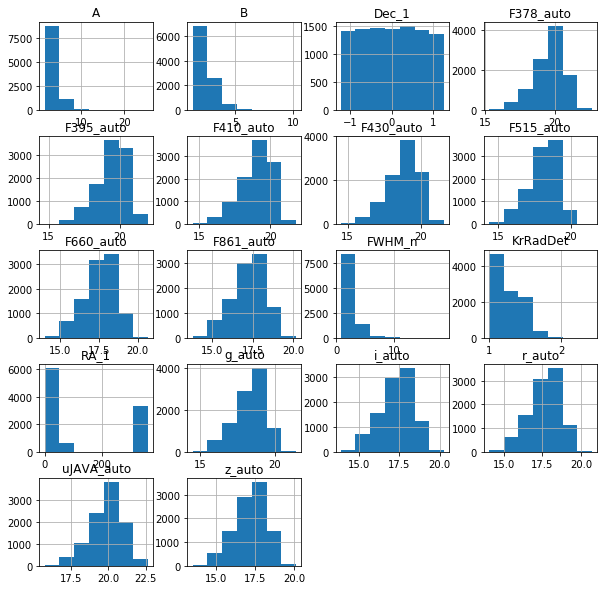

In [0]:
data.hist(bins = 7, figsize=(10,10))
plt.show()

In [0]:
data.info()

In [0]:
data[['class']].count()

class    10000
dtype: int64

In [0]:
data.groupby('class')['FWHM_n', 'A', 'B', 'r_auto'].mean()

,FWHM_n,A,B,r_auto
class,,,,
GALAXY,3.096326,4.204862,2.939528,18.179772
STAR,1.026850,2.230110,2.099216,17.121718


In [0]:
data.groupby('class')['FWHM_n', 'A', 'B', 'r_auto'].std()

,FWHM_n,A,B,r_auto
class,,,,
GALAXY,1.516924,1.519897,0.829550,0.724965
STAR,0.196149,0.339022,0.318185,0.989633


In [0]:
filtro = data[['FWHM_n', 'A', 'B', 'class']]
filtro.head()

,FWHM_n,A,B,class
0,2.64,3.08,2.40,GALAXY
1,2.19,4.50,4.30,GALAXY
2,2.13,2.79,2.70,GALAXY
3,2.33,4.29,2.48,GALAXY
4,1.96,2.58,2.52,GALAXY


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbfb70fa20>,
      dtype=object)

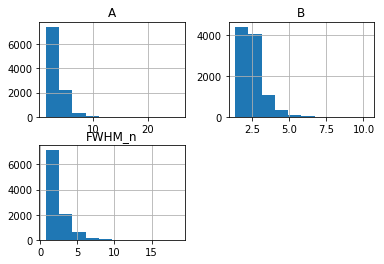

In [0]:
filtro.hist()

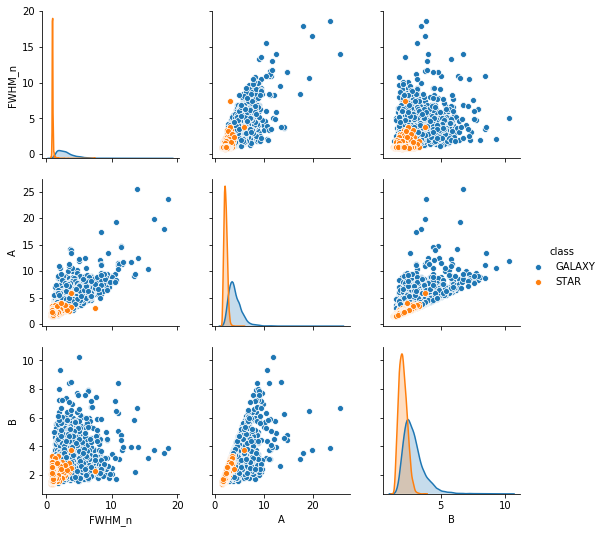

In [0]:
sns.pairplot(filtro, hue = 'class')

In [0]:
filtro.corr()

NameError: ignored

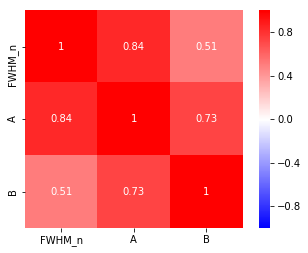

In [0]:
sns.heatmap(filtro.corr(), cmap='bwr', vmax=1, vmin=-1,center=0, square=True, annot=True)

In [0]:
#x_train, x_test, y_train, y_test = train_test_split(iris, target, test_size = 0.3, random_state = 2)
x_train, x_test, y_train, y_test = train_test_split(data, filtro, test_size = 0.25, random_state = 2)

In [0]:
x_train.head()

,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,class
2753,STRIPE82-0116,SPLUS.STRIPE82-0116.18627.griz,320.0374,0.5269,2.40,3.00,2.57,1.03,20.82,20.85,20.03,20.96,20.27,19.78,19.37,19.08,19.04,18.76,18.59,18.54,GALAXY
2824,STRIPE82-0006,SPLUS.STRIPE82-0006.00899.griz,3.3445,0.0907,3.24,4.17,3.54,1.57,18.91,18.86,18.36,18.09,17.86,17.76,17.52,17.13,17.10,16.90,16.80,16.75,GALAXY
2597,STRIPE82-0017,SPLUS.STRIPE82-0017.22620.griz,11.5048,-0.3258,1.83,3.89,2.80,1.40,20.82,20.70,20.11,19.94,19.97,18.98,18.55,18.07,17.88,17.57,17.38,17.26,GALAXY
3973,STRIPE82-0113,SPLUS.STRIPE82-0113.33652.griz,319.0654,-0.5722,1.36,3.07,2.86,1.53,20.01,19.93,19.84,19.64,19.22,18.77,18.55,18.09,17.93,17.70,17.54,17.51,GALAXY
3335,STRIPE82-0004,SPLUS.STRIPE82-0004.11996.griz,1.0136,0.6456,10.06,8.01,2.10,1.43,20.01,19.68,19.42,19.24,18.74,18.39,18.18,17.73,17.59,17.34,17.11,17.07,GALAXY


In [0]:
x_test.head()

,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,class
7878,STRIPE82-0035,SPLUS.STRIPE82-0035.20314.griz,23.7080,-0.3641,0.99,2.64,2.49,1.10,18.47,18.23,18.09,17.40,17.33,16.91,16.71,16.36,16.31,16.22,16.16,16.17,STAR
3224,STRIPE82-0055,SPLUS.STRIPE82-0055.27364.griz,38.5506,-0.6287,2.11,3.91,3.73,1.40,18.59,18.63,18.60,18.31,18.01,17.75,17.51,17.23,17.10,16.91,16.87,16.83,GALAXY
1919,STRIPE82-0135,SPLUS.STRIPE82-0135.05970.griz,335.0809,-1.1662,2.51,2.77,1.89,1.40,21.42,21.20,20.88,20.50,20.47,20.06,19.95,19.52,19.36,19.10,18.89,18.96,GALAXY
4432,STRIPE82-0063,SPLUS.STRIPE82-0063.19100.griz,44.0778,-0.2658,1.73,3.04,2.79,1.41,20.21,20.13,19.74,19.81,19.35,18.79,18.51,18.04,17.90,17.66,17.55,17.44,GALAXY
4835,STRIPE82-0164,SPLUS.STRIPE82-0164.39372.griz,353.9220,1.0522,5.44,5.56,2.42,1.31,20.45,20.29,20.19,19.32,19.48,18.99,18.67,18.28,18.09,17.87,17.68,17.63,GALAXY


In [0]:
#dataset para validação de dados
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size = 0.25, random_state = 2)

In [0]:
x_train1.head()

,FIELD,ID,RA_1,Dec_1,FWHM_n,A,B,KrRadDet,uJAVA_auto,F378_auto,F395_auto,F410_auto,F430_auto,g_auto,F515_auto,r_auto,F660_auto,i_auto,F861_auto,z_auto,class
7914,STRIPE82-0020,SPLUS.STRIPE82-0020.27738.griz,12.2181,0.8703,0.93,2.83,2.71,1.03,18.56,18.48,18.20,17.42,17.16,16.60,16.44,15.83,15.73,15.61,15.53,15.51,STAR
8546,STRIPE82-0102,SPLUS.STRIPE82-0102.60626.griz,310.3478,0.8913,0.97,1.85,1.68,1.06,20.17,19.78,19.57,19.02,18.95,18.51,18.28,17.94,17.79,17.67,17.63,17.63,STAR
2070,STRIPE82-0032,SPLUS.STRIPE82-0032.13636.griz,21.2257,0.6562,1.62,4.30,4.02,1.27,19.22,18.95,18.86,18.53,18.15,17.78,17.47,17.06,16.89,16.64,16.46,16.40,GALAXY
5472,STRIPE82-0023,SPLUS.STRIPE82-0023.05093.griz,15.0026,-1.1399,1.02,2.12,2.10,1.08,19.25,19.09,19.03,18.34,18.20,17.76,17.57,17.18,17.12,16.97,16.92,16.88,STAR
3808,STRIPE82-0012,SPLUS.STRIPE82-0012.14793.griz,7.7191,0.6229,1.56,3.25,2.48,1.33,20.03,20.05,19.81,19.73,19.44,18.97,18.64,18.30,18.16,17.92,17.76,17.75,GALAXY


In [0]:
model = SVC(kernel='linear')
model.fit(x_train, y_train.values.ravel())

ValueError: ignored